# Face Recognition using VGG_Face architecture

In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import os

"""
    
    This part of the code initialises the data_generators for both training and validation sets.
    Make sure you use the correct path. Do not forget to maintain a valid dataset well before hand using the
    Extract_Faces.ipynb notebook!

"""

img_rows, img_cols = 224,224
batch_size = 16

train_data_dir = './faces/train'
validation_data_dir = './faces/validation'

# Let's use some data augmentation and define our generators
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      width_shift_range=0.4,
      height_shift_range=0.4,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

train_images = train_generator.samples
validation_images = validation_generator.samples

Using TensorFlow backend.


Found 420 images belonging to 8 classes.
Found 160 images belonging to 8 classes.


In [2]:
#Make a dictionary for later use in predictions
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)

#Define number of classes for our model architecture
num_classes = max(class_labels.keys()) + 1


{0: 'Chandler', 1: 'Joey', 2: 'Kiran', 3: 'Mayank', 4: 'Muskan', 5: 'Pheobe', 6: 'Rachel', 7: 'Yogesh'}


In [3]:
#Let us create our model
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,Model
from keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
import keras.backend as K

"""
    Here we have used the predefined VGG_Face model architecture and the pretrained weights of the model.
    We will add our own trainable fully connected layers afterwards.
    Download the weights from https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo

"""

# Define VGG_FACE_MODEL architecture
model = Sequential()

#First block of Conv2d layers
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))

#Second block of Conv2d layers
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))

#Third block of Conv2d layers
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))

#Fourth block of Conv2d layers
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))

#Fifth block of Conv2d layers
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

#Sixth block of Conv2d layers
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))

#Seventh block of Conv2d layers
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

model.load_weights('vgg_face_weights.h5')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
__________

In [4]:
#Since we are using the pretrained model we will not allow the layers of our model to be trainable
for layer in model.layers:
    layer.trainable = False
    
# Let's check our layers 
for (i,layer) in enumerate(model.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    
print(model.summary())

0 ZeroPadding2D False
1 Conv2D False
2 ZeroPadding2D False
3 Conv2D False
4 MaxPooling2D False
5 ZeroPadding2D False
6 Conv2D False
7 ZeroPadding2D False
8 Conv2D False
9 MaxPooling2D False
10 ZeroPadding2D False
11 Conv2D False
12 ZeroPadding2D False
13 Conv2D False
14 ZeroPadding2D False
15 Conv2D False
16 MaxPooling2D False
17 ZeroPadding2D False
18 Conv2D False
19 ZeroPadding2D False
20 Conv2D False
21 ZeroPadding2D False
22 Conv2D False
23 MaxPooling2D False
24 ZeroPadding2D False
25 Conv2D False
26 ZeroPadding2D False
27 Conv2D False
28 ZeroPadding2D False
29 Conv2D False
30 MaxPooling2D False
31 Conv2D False
32 Dropout False
33 Conv2D False
34 Dropout False
35 Conv2D False
36 Flatten False
37 Activation False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_1 (

In [5]:
#Now lets remove the final activation layer of the model
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)
print(vgg_face.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1_input (Inpu (None, 224, 224, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 114, 114, 64)      0         
__________

In [6]:
#Function which return a model after adding the FC layers
def addTopModel(bottom_model):
    top_model = bottom_model.output
    top_model = Dense(128,activation='elu')(top_model)
    top_model = Dense(64,activation='elu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    
    return top_model

In [7]:
#Lets combine the model
head = addTopModel(vgg_face)
model = Model(inputs = vgg_face.input, outputs = head)

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1_input (Inpu (None, 224, 224, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 114, 114, 64)      0         
__________

# Training our model 

In [8]:
#Training our model
#This model has been trained only for one epoch. One could do some tweakings!
from keras.optimizers import RMSprop, SGD,Adadelta
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("face_classifier.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, verbose = 1, min_delta = 0.0001)

callbacks = [earlystop, checkpoint, reduce_lr]

nb_train_samples = train_images
nb_validation_samples = validation_images
batch_size = 16
epochs = 1

model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'rmsprop',
                  metrics = ['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)


Epoch 1/1
26/26 [==============================] - 177s 7s/step - loss: 1.3742 - acc: 0.7019 - val_loss: 0.5503 - val_acc: 0.9187

Epoch 00001: val_loss improved from inf to 0.55027, saving model to face_classifier.h5


# Lets Test our model on realtime video

In [9]:
# Loading our model
from keras.models import load_model
classifier = load_model('face_classifier.h5')

In [12]:
#Test on realtime video
from os import listdir
from os.path import isfile, join
import os
import cv2
import numpy as np
import dlib


def draw_label(image, point, label, font=cv2.FONT_HERSHEY_SIMPLEX,
               font_scale=0.8, thickness=1):
    size = cv2.getTextSize(label, font, font_scale, thickness)[0]
    x, y = point
    cv2.rectangle(image, (x, y - size[1]), (x + size[0], y), (255, 0, 0), cv2.FILLED)
    cv2.putText(image, label, point, font, font_scale, (255, 255, 255), thickness, lineType=cv2.LINE_AA)
    
#Define our prediction dictionary
face_classes = class_labels
img_size = 224
margin = 0.2
# Use the efficient dlib's face detector
detector = dlib.get_frontal_face_detector()

#I have used my webcam, one may use a '.mp4' video as well
cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read()
#     frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    preprocessed_faces = []           
 
    input_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img_h, img_w, _ = np.shape(input_img)
    detected = detector(frame, 1)
    faces = np.empty((len(detected), img_size, img_size, 3))
   
    if len(detected) > 0:
        
        for i, d in enumerate(detected):
            
            # Obtain the coordinates of the detected face and draw a bounding box
            x1, y1, x2, y2, w, h = d.left(), d.top(), d.right() + 1, d.bottom() + 1, d.width(), d.height()
            xw1 = max(int(x1 - margin * w), 0)
            yw1 = max(int(y1 - margin * h), 0)
            xw2 = min(int(x2 + margin * w), img_w - 1)
            yw2 = min(int(y2 + margin * h), img_h - 1)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
            face =  frame[yw1:yw2 + 1, xw1:xw2 + 1, :]
            face = cv2.resize(face, (img_rows,img_cols), interpolation = cv2.INTER_AREA)
            face = face.astype("float32") / 255.0
            face = np.expand_dims(face, axis=0)
            preprocessed_faces.append(face)

        
        # Make predictions for the detected face 
        face_labels = []
        for i, d in enumerate(detected):
            preds = classifier.predict(preprocessed_faces[i])[0]
            face_labels.append(face_classes[np.argmax(preds)])
        
        # Display the results
        for i, d in enumerate(detected):
            label = "{}".format(face_labels[i])
            draw_label(frame, (d.left(), d.top()), label)

    cv2.imshow("Face Recognition", frame)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()      

Some Test Results

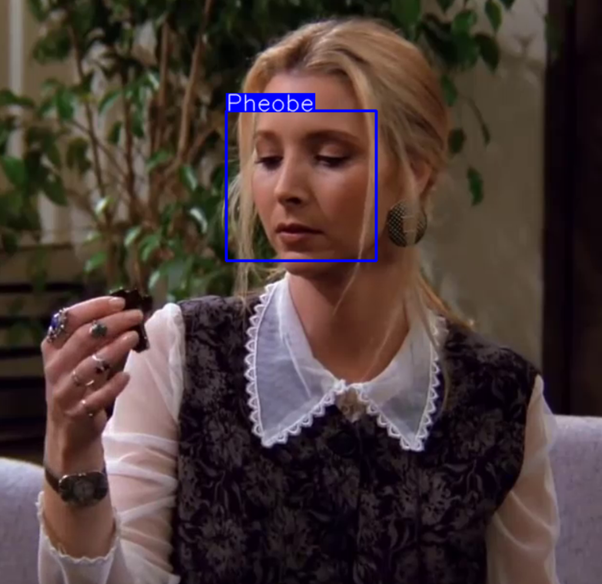

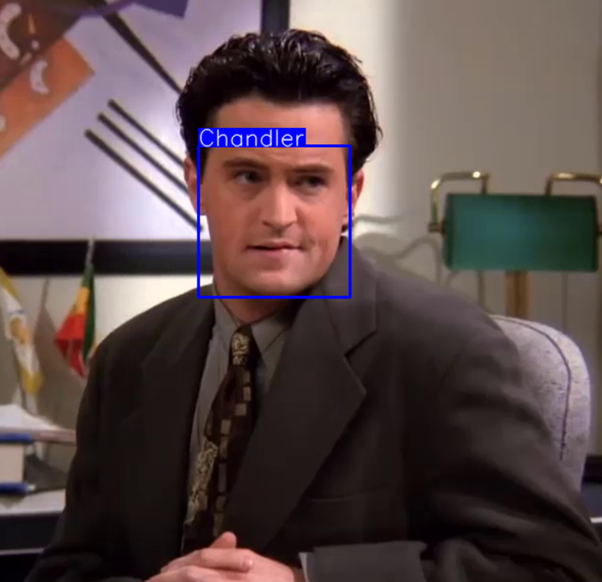

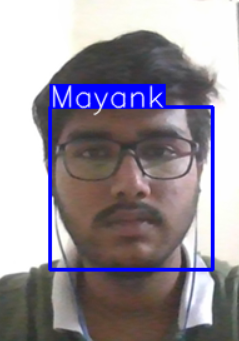